# Customer interactions project for "Model Fitness" gym chain

In this project I have various data on customer behaviour.<br> My main goals are:
* To understand churn factors and to develop model predicting probability of user churn in the following month.
* To identify target groups and define criteria for those groups.
* To improve and personalize customer interactions strategy.

# Table of contents:
1. [Download the data](#Step-1.-Download-the-data)
2. [Exploratory data analysis](#Step-2.-Carry-out-exploratory-data-analysis-(EDA))
3. [Model to predict user churn](#Step-3.-Build-a-model-to-predict-user-churn)
4. [User clusters](#Step-4.-Create-user-clusters)
5. [Conclusions and recommendations](#Step-5.-Come-up-with-conclusions-and-basic-recommendations-on-working-with-customers)

In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Step 1. Download the data

In [2]:
try: # locally
    data = pd.read_csv('datasets/gym_churn_us.csv')
except: # globally
    data = pd.read_csv('/datasets/gym_churn_us.csv')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# convert column names to lower registry:

data.columns = [col.lower() for col in data.columns]
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

# Step 2. Carry out exploratory data analysis (EDA)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [6]:
data.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


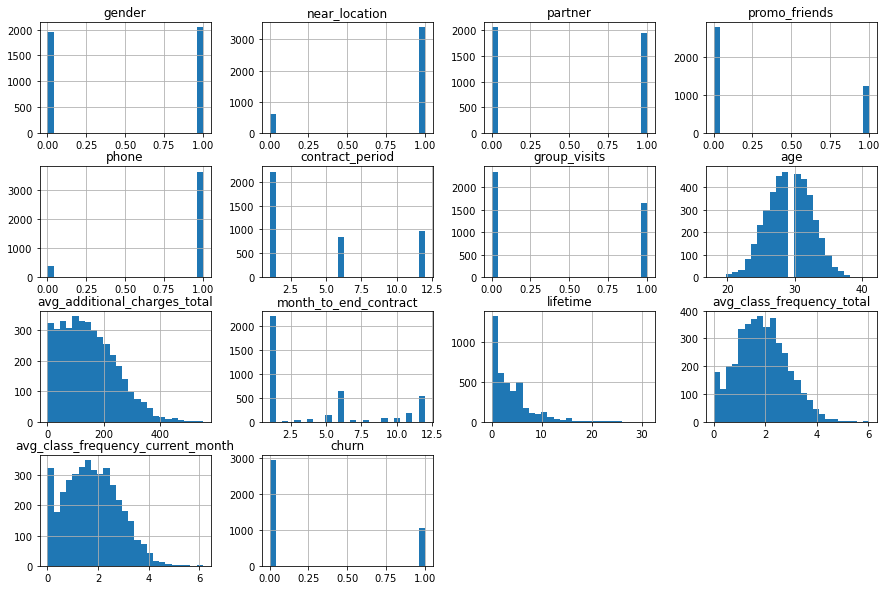

In [7]:
# take a general look at all histogram
data.hist(bins = 25, figsize = (15,10))
plt.title('Data histograms')
plt.show()

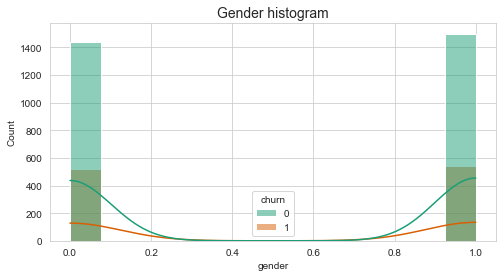

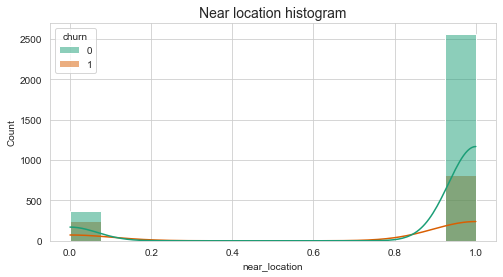

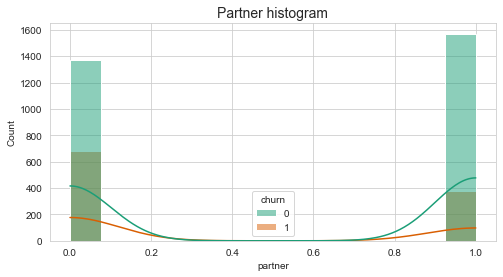

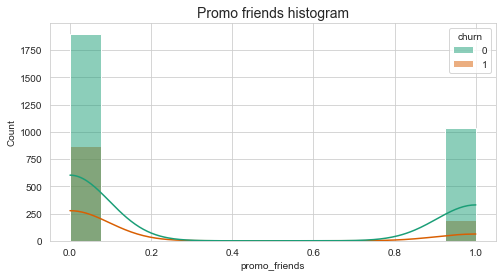

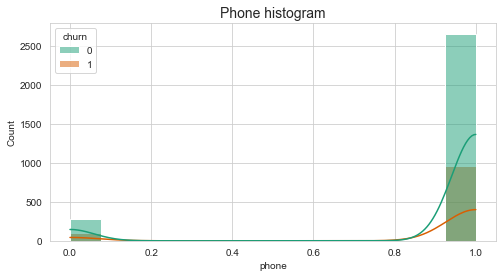

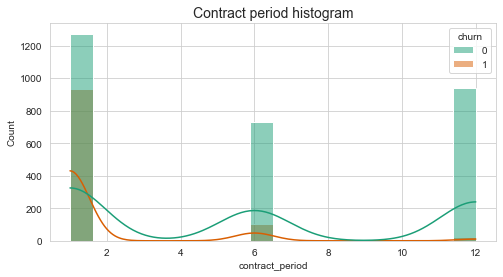

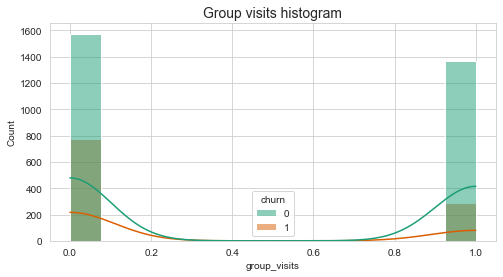

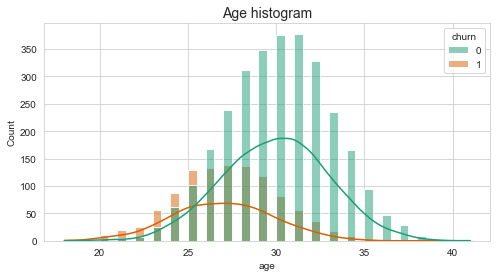

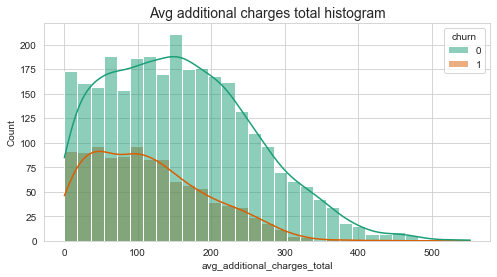

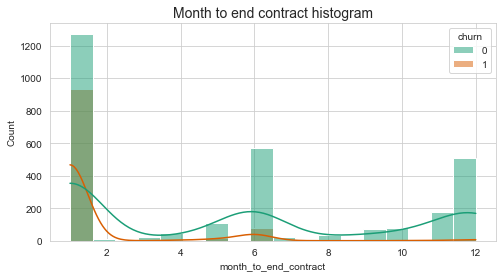

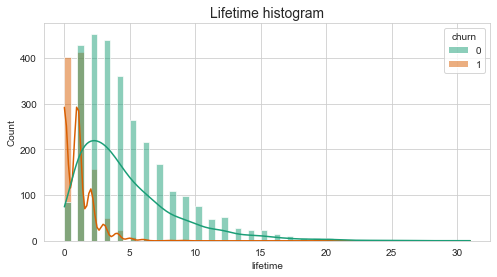

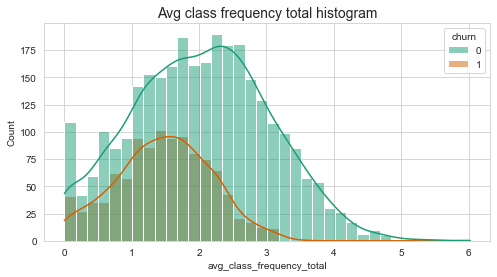

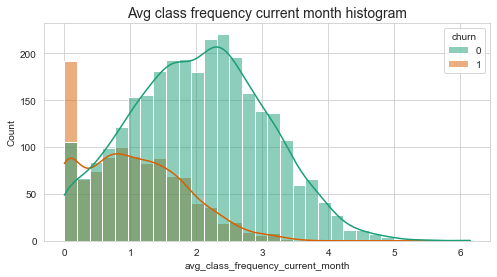

In [8]:
# look at separate histograms, highlighted according to churn values
for column in data.columns:
    if column != 'churn':
        sns.set_style('whitegrid')
        plt.figure(figsize = (8,4))
        sns.histplot(data, x = column, hue = 'churn', palette = 'Dark2', kde = True).set_title(
            column.replace('_', ' ').capitalize() + ' histogram', fontsize = 14)
        plt.show()

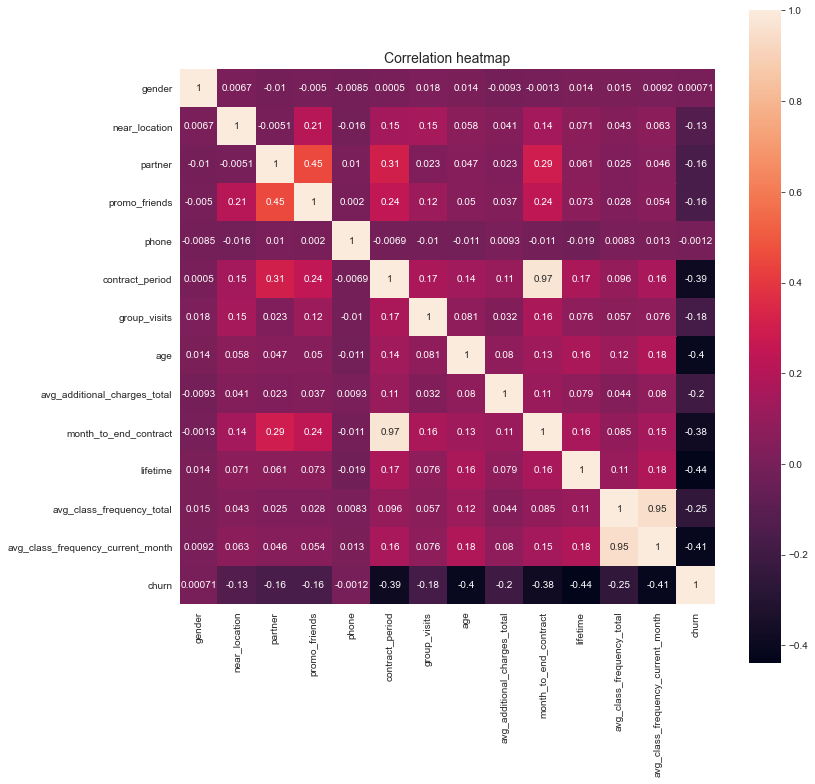

In [9]:
data_corr = data.corr()

plt.figure(figsize = (12,12))
sns.heatmap(data_corr, square = True, annot = True)
plt.title('Correlation heatmap', fontsize = 14)
plt.show()

#### <font color = 'blue'>Notes:</font>
* There are 7 numeric and 6 binary features. The target variable is also binary.
* In binary features, only the 'gender' and 'partner' features are evenly distributed.
* There are two pairs of highly correlated features, which values logically interconnected: 'month_to_end_contract'-'contract_period' and 'avg_class_frequency_current_month'-'avg_class_frequency_total'. For training models I will have to chose only one from each pair.
* Some of the numerical features are either distributed unevenly, highly variated or both: standardization of data is needed.

[Table of Contents](#Table-of-contents:)

## Data preprocessing

In [10]:
# Remove features which have highly correlated "twins" in the dataset:
data_upd = data.drop(['contract_period', 'avg_class_frequency_total'], axis = 1)

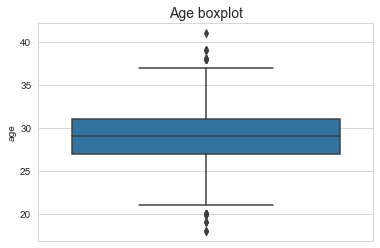

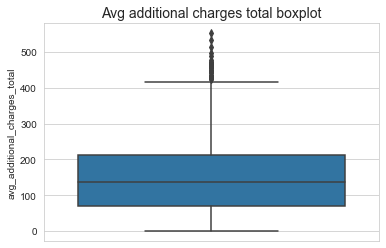

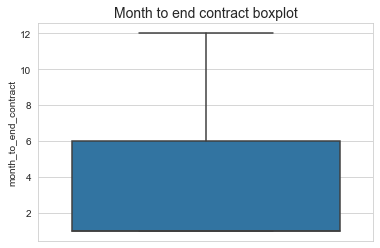

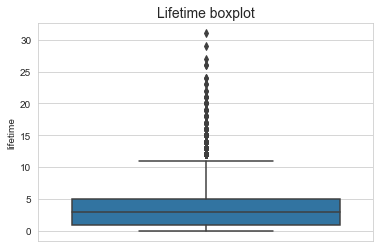

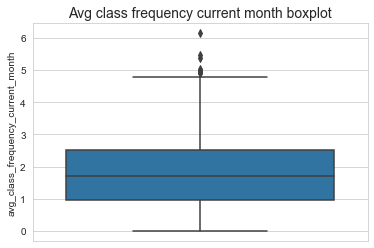

In [11]:
# check boxplots for non_binary features to look at possible outliers:
non_binary_features = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 
                       'avg_class_frequency_current_month']

for column in non_binary_features:
    plt.figure(figsize = (6,4))
    sns.boxplot(y = data_upd[column]).set_title(column.replace('_', ' ').capitalize() + ' boxplot', fontsize = 14)
    plt.show()

In [12]:
# Check low and high procentiles for columns with possible outliers:

perc = pd.DataFrame()

for column in non_binary_features:
    if column not in ['month_to_end_contract', 'age']:
        perc = perc.append(pd.Series(np.percentile(data_upd[column], [50, 95, 98]), name = column))
        
perc.columns = [50, 95, 97.5]
perc.round(2)

,50.0,95.0,97.5
avg_additional_charges_total,136.22,323.44,369.13
lifetime,3.00,11.00,15.00
avg_class_frequency_current_month,1.72,3.55,3.95


In [13]:
# check what share of data will be removed with outliers if we set them at 95% and 98%:
print('If we remove higher 5% of values as outliers, we will lose {:.2%} of the rows.'.format(
    len(data_upd.query('avg_additional_charges_total > 323.44 or lifetime > 11 or avg_class_frequency_current_month > 3.55')) / 
    len(data)))
print('If we remove higher 2% of values as outliers, we will lose {:.2%} of the rows.'.format(
    len(data_upd.query('avg_additional_charges_total > 369.13 or lifetime > 15 or avg_class_frequency_current_month > 3.95')) / 
    len(data)))

If we remove higher 5% of values as outliers, we will lose 13.95% of the rows.
If we remove higher 2% of values as outliers, we will lose 5.58% of the rows.


In [14]:
# remove 2% of higher values and store the updated data in separate dataframe
data_upd = data_upd.query('avg_additional_charges_total < 369.13 & lifetime < 15 & avg_class_frequency_current_month < 3.95')
data_upd.shape

(3753, 12)

#### <font color = 'blue'>Notes:</font>

* **Missing values**: there were none.
* **Remove highly correlated features** - features 'contract_period' and 'avg_class_frequency_total' were removed.
* **Outliers**: 
    * According to boxplots, there was no outliers in 'month_to_end_contract' features.
    * Although 'age' feature boxplot points to some outliers, I decided against removing them since this feature's distribution is normal and even.
    * Remaining 3 numerical features had outliers in the upper values. After checking how much data I will lose, I decided to remove 2% of higher values in those features. Resulting data loss was 5.58% of the dataset.
    
[Table of Contents](#Table-of-contents:)

# Step 3. Build a model to predict user churn

In [15]:
# define features and target value:
X = data_upd.drop('churn', axis = 1)
y = data_upd['churn']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
# standardize data:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
# train logistic regression model:
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(X_train_st, y_train)
predictions_lr = model_lr.predict(X_test_st)

In [18]:
# train random forest model:
model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(X_train_st, y_train)
predictions_rf = model_rf.predict(X_test_st)

In [19]:
# write a function for printing accuracy, precision and recall metrics:
def print_metrics(model_name, y_true, y_pred):
    print('Model name is: ', model_name)
    print('Accuracy score for this model is: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Precision score for this model is: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Recall score for this model is: {:.2f}'.format(recall_score(y_true, y_pred)))

In [20]:
# check scores for both models:
print_metrics('Logistic Regression', y_test, predictions_lr)
print()
print_metrics('Random Forest', y_test, predictions_rf)

Model name is:  Logistic Regression
Accuracy score for this model is: 0.91
Precision score for this model is: 0.77
Recall score for this model is: 0.87

Model name is:  Random Forest
Accuracy score for this model is: 0.89
Precision score for this model is: 0.77
Recall score for this model is: 0.80


#### <font color = 'blue'>Notes:</font>
* Accuracy score is slightly higher for Logistic Regression. <br> Anyway, since it's better for balanced classes and 'churn' rate isn't balanced, I wouldn't rely on it much.
* Precision score is the same for both models.
* Recall score is better for Logistic Regression model, meaning this model gives higher ratio of correctly predicted positive observations out of total true observations.

Considering all the above, **Logistic Regression** model is the best choice.

[Table of Contents](#Table-of-contents:)

# Step 4. Create user clusters

In [21]:
# standardize the features (without splitting):
X_st = scaler.fit_transform(X)

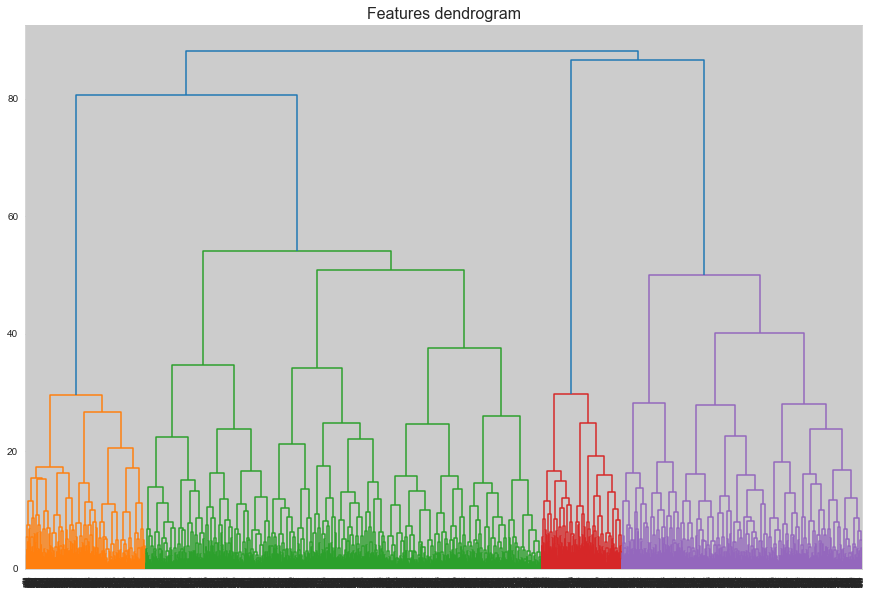

In [22]:
linked = linkage(X_st, method = 'ward')

plt.figure(figsize = (15,10))
dendrogram(linked, orientation = 'top')
plt.title('Features dendrogram', fontsize = 16)
plt.show()

In [23]:
# Train KMeans model
model_km = KMeans(n_clusters = 5)

# get labels
labels_km = model_km.fit_predict(X_st)

In [24]:
data_upd['cluster_labels'] = labels_km

# get mean values for clusters:
data_upd.groupby('cluster_labels').mean().sort_values(
    'churn').style.highlight_max(color = '#97DFA1').highlight_min(color = '#FCA965')

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
cluster_labels,,,,,,,,,,,,
1,0.513642,0.990510,0.877817,0.678529,1.000000,0.615658,30.465006,164.910619,8.837485,5.098458,2.188817,0.005931
4,0.527624,0.856354,0.472376,0.312155,0.000000,0.419890,29.281768,141.270291,4.475138,3.475138,1.643938,0.284530
2,0.529771,1.000000,0.000000,0.053435,1.000000,0.412977,29.019847,138.204030,2.753435,2.975573,1.666647,0.345038
0,0.475921,1.000000,0.936261,0.515581,1.000000,0.266289,28.137394,123.591131,2.759207,2.484419,1.346131,0.388102
3,0.503759,0.000000,0.488722,0.077068,1.000000,0.223684,28.650376,131.661317,2.765038,2.774436,1.558792,0.421053


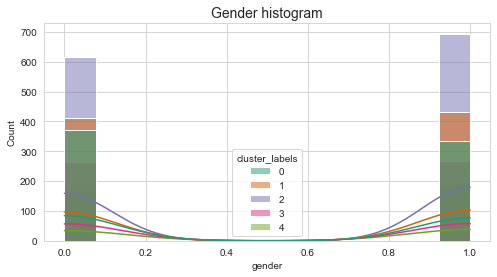

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


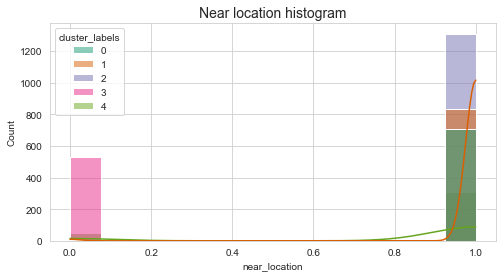

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


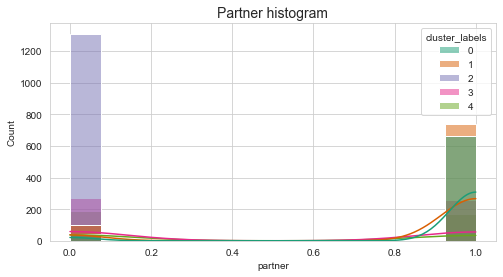

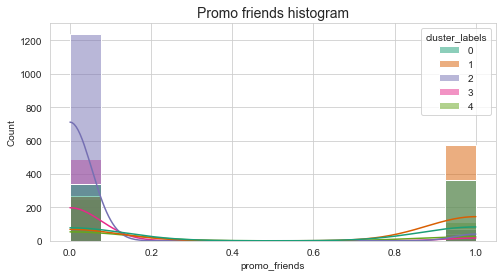

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


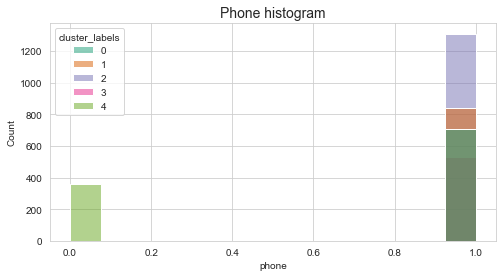

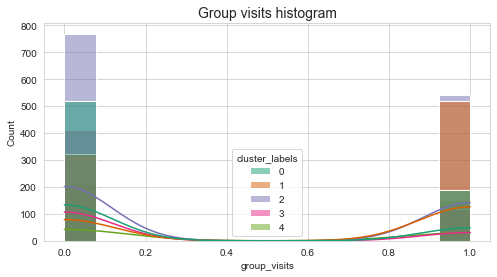

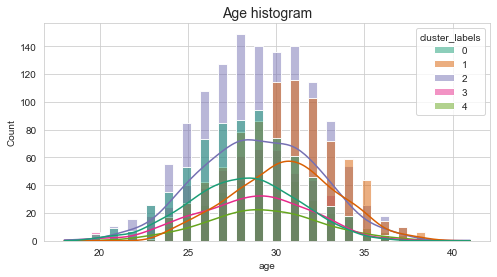

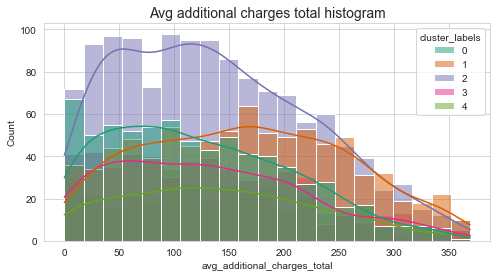

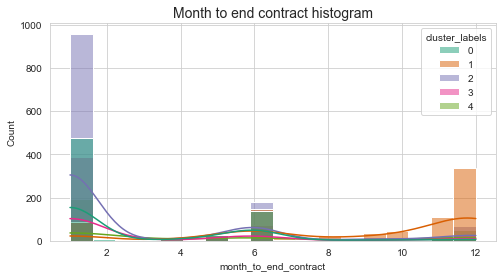

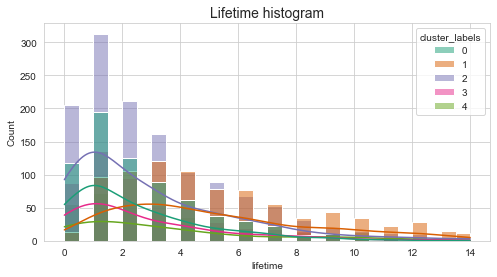

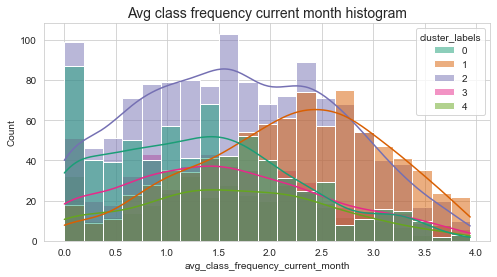

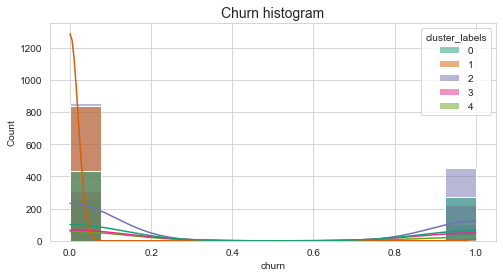

In [25]:
# plot distributions with highlighted clusters:
for column in data_upd.columns:
    if column != 'cluster_labels':
        sns.set_style('whitegrid')
        plt.figure(figsize = (8,4))
        sns.histplot(data_upd, x = column, hue = 'cluster_labels', palette = 'Dark2', kde = True).set_title(
            column.replace('_', ' ').capitalize() + ' histogram', fontsize = 14)
        plt.show()

#### <font color = 'blue'>Notes:</font>

* **Cluster 0** customers are the most loyal ones. On average they are oldest, pay most in additional charges, have highest lifetime, highest frequency of visits. They prefer group visits more than any other clusters. Most of them didn't sign up trough 'bring a friend' action. They are highly unlikely to churn.
* **Cluster 3** is the worrisome one: those users have highest churn risk. On average, users from this cluster are the youngest, pay less additional charges than other, have shortest lifetime, lowest frequency and shortest time until the end of contract. Most of those users do not belong to partner establishments.
* **Cluster 1** is characterized mostly by users who are not living or working near the gym and also they have smallest ratio of group visits. This cluster has second highest churn risk.
* **Cluster 2** is mostly consisted of workers of partner establishments and "bring-a-friend" action registered users. They have second highest average additional charge and second lowest churn risk.
* **Cluster 4** is defined mostly by not leaving their phone number, and it's users rated in the middle in most features.

**Features that can indicate churn risk**:
* Group visits, age, additional charges, lifetime and frequency - the higher they are, the lower churn rate is, and vice versa.

**Features that don't seem connected to churn risk at all**:
* Gender, location, phone number, partner establishment, promo friends action.

[Table of Contents](#Table-of-contents:)

# Step 5. Come up with conclusions and basic recommendations on working with customers


### Project summary:
This project's main goals were to improve customer interaction strategy and find ways to reduce churn rate.<br>
After conducting primary exploratory analysis, I trained two machine learning models and found best suitable one to predict user's churn rate in the next month. Then I used K-Means to divide users into 5 main clusters, united by common characteristics (as described above, in summary for section 4). With this approach we may use personalized strategy in order to improve company's interactions with users and improve customer retention rates.

## Recommendations:
* There are 4 main target groups: old clients, loners (those who live/work far away and don't like groups), 'actions and promo' clients and high risk clients. There is also fifth group, but it's less distinguishable: it's main property is being average on all means. 
* Also there are 5 features that reduce churn risk: group visits, age, additional charges, lifetime and frequency. Though we cannot affect some of those factors (such as customer's age), other ones we can affect and aim to improve.
* High risk clients and loners have highest possible churn ratios. To reduce this risk, I would recommend:
    * Encourage those users to try group trainings, for example give them discount for the first one.
    * Encourage them to pay for more services via different actions and discounts.
    * To run a loyalty/frequency program, for example give discount or some interesting service/promo at partners (free breakfast in partner cafe, discount in partner shop etc) for higher frequency visits (e.g. specified number of visits per period of time), or/and for loyalty anniversaries (6 month friendship length, 1 year, etc

[Table of Contents](#Table-of-contents:)